<a href="https://colab.research.google.com/github/Daniil71/analysis_researches/blob/main/AIC_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

In [ ]:
df = pd.read_csv('retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/19 8:26,"3,39",17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/19 8:34,"1,69",13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/19 8:34,"5,95",13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/19 8:34,"4,95",13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/19 9:02,"2,75",17850.0,United Kingdom


# Подготовка

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    54214 non-null  object 
 1   StockCode    54214 non-null  object 
 2   Description  54080 non-null  object 
 3   Quantity     54214 non-null  int64  
 4   InvoiceDate  54214 non-null  object 
 5   UnitPrice    54214 non-null  object 
 6   CustomerID   40643 non-null  float64
 7   Country      54214 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.3+ MB


In [ ]:
# видим, что у небольшого количества товаров нет описаний и отсутствуют данные по ~30% покупателям
# переведём цену в числовой тип, дату из object в datetime и айди покупателя в object
df['UnitPrice'] = df['UnitPrice'].str.replace(',','.').astype(float)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(object)

In [ ]:
df.describe(include = 'all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,54214,54214,54080,54214.000000,54214,54214.000000,40643.0,54214
unique,14877,3351,3401,NaN,14058,NaN,3819.0,37
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2020-10-31 14:41:00,NaN,17841.0,United Kingdom
freq,127,237,243,NaN,127,NaN,771.0,49602
first,NaN,NaN,NaN,NaN,2019-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.610802,NaN,4.307341,NaN,NaN
std,NaN,NaN,NaN,57.358422,NaN,47.834496,NaN,NaN
min,NaN,NaN,NaN,-9600.000000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,NaN,NaN


In [ ]:
# Уникальных транзакций - 14877, кодов товаров - 3351, описаний - 3401, покупателей - 3819, стран - 37
# Описаний больше, чем кодов - значит, есть товары с одинаковым кодом, но разными описаниями
# Сразу видим странные значения в колонке с количеством товаров, равно как и статистические выбросы по количеству и ценам.

# посмотрим на числовые занчения с большим количеством квантилей 
df.describe(percentiles = [.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,Quantity,UnitPrice
count,54214.000000,54214.000000
mean,9.610802,4.307341
std,57.358422,47.834496
min,-9600.000000,0.000000
1%,-2.000000,0.210000
10%,1.000000,0.650000
20%,1.000000,0.850000
30%,2.000000,1.250000
40%,2.000000,1.650000
50%,3.000000,2.080000


In [ ]:
print(df[df['Quantity'] < 0 ].count())
print('-'*10)
print(df[df['UnitPrice'] == 0 ].count())

InvoiceNo      1083
StockCode      1083
Description     999
Quantity       1083
InvoiceDate    1083
UnitPrice      1083
CustomerID      921
Country        1083
dtype: int64
----------
InvoiceNo      225
StockCode      225
Description     91
Quantity       225
InvoiceDate    225
UnitPrice      225
CustomerID       4
Country        225
dtype: int64


In [ ]:
# практически у двух процентов наших данных неверные записи: количество товаров меньше 0 или же цена равна нулю
# интересно, что в случае с ценой у нас всего 4 покупателя

df[df['Quantity'] < 0 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
19,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2019-12-01 09:49:00,4.65,15311.0,United Kingdom
30,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2019-12-01 10:24:00,0.29,17548.0,United Kingdom
31,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2019-12-01 10:24:00,0.29,17548.0,United Kingdom
202,C536548,20957,PORCELAIN HANGING BELL SMALL,-1,2019-12-01 14:33:00,1.45,12472.0,Germany
375,C536642,21463,MIRRORED DISCO BALL,-1,2019-12-02 11:56:00,5.95,14390.0,United Kingdom
...,...,...,...,...,...,...,...,...
53704,C581229,79191C,RETRO PLASTIC ELEPHANT TRAY,-24,2020-12-08 10:14:00,0.85,12558.0,USA
53705,C581229,21507,ELEPHANT BIRTHDAY CARD,-12,2020-12-08 10:14:00,0.42,12558.0,USA
53765,C581322,22666,RECIPE BOX PANTRY YELLOW DESIGN,-1,2020-12-08 11:51:00,2.95,18223.0,United Kingdom
53770,C581330,22959,WRAP CHRISTMAS VILLAGE,-25,2020-12-08 11:57:00,0.42,15877.0,United Kingdom


In [ ]:
df[df['Quantity'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
df[df['UnitPrice'] == 0 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
204,536553,37461,NaN,3,2019-12-01 14:35:00,0.0,NaN,United Kingdom
730,536995,35951,NaN,57,2019-12-03 15:29:00,0.0,NaN,United Kingdom
731,536998,85067,NaN,-6,2019-12-03 15:30:00,0.0,NaN,United Kingdom
732,537005,21692,NaN,-70,2019-12-03 15:35:00,0.0,NaN,United Kingdom
733,537009,84534B,NaN,-80,2019-12-03 15:38:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
51508,579743,21810,check,-135,2020-11-30 14:36:00,0.0,NaN,United Kingdom
52171,580359,20775,NaN,-35,2020-12-02 16:11:00,0.0,NaN,United Kingdom
53536,581207,21688,mixed up,-337,2020-12-07 18:34:00,0.0,NaN,United Kingdom
53537,581209,21620,NaN,6,2020-12-07 18:35:00,0.0,NaN,United Kingdom


In [ ]:
# Ясно. Большинство купивших по 0 у нас - NaN'ы. 
# Смотря на описания, можно увидеть, что записи эти странные - категории пропавших, проверочных или просто отсутствующие описания.

In [ ]:
# удивительный клиент с максимальным выбросом по количеству и ценой в 0. Из описания очевидно, что это выброшенные товары - просто списания.
df[df['Quantity'] == -9600]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
22627,556691,23005,printing smudges/thrown away,-9600,2020-06-14 10:37:00,0.0,NaN,United Kingdom


In [ ]:
# В итоге почти все клиенты с ценой в 0 - это наны.
df[df['UnitPrice'] == 0]['CustomerID'].value_counts()

16560.0    1
14110.0    1
12444.0    1
16406.0    1
Name: CustomerID, dtype: int64

In [ ]:
# отметим следующий факт: если в строке с количеством < 0 цена отличается от нуля, то у инвойса стоит 'C'.
# Можем предположить, что это возвраты товаров
df[df['Quantity'] < 0 ].head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
19,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2019-12-01 09:49:00,4.65,15311.0,United Kingdom
30,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2019-12-01 10:24:00,0.29,17548.0,United Kingdom
31,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2019-12-01 10:24:00,0.29,17548.0,United Kingdom
202,C536548,20957,PORCELAIN HANGING BELL SMALL,-1,2019-12-01 14:33:00,1.45,12472.0,Germany
375,C536642,21463,MIRRORED DISCO BALL,-1,2019-12-02 11:56:00,5.95,14390.0,United Kingdom
402,C536734,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2019-12-02 12:50:00,7.95,16042.0,United Kingdom
437,C536758,21314,SMALL GLASS HEART TRINKET POT,-1,2019-12-02 14:25:00,2.10,13767.0,United Kingdom
442,C536760,22273,FELTCRAFT DOLL MOLLY,-3,2019-12-02 14:29:00,2.95,17547.0,United Kingdom
488,C536812,22130,PARTY CONE CHRISTMAS DECORATION,-144,2019-12-02 16:58:00,0.72,16546.0,United Kingdom
489,C536820,22877,NUMBER TILE COTTAGE GARDEN 9,-1,2019-12-02 17:14:00,1.95,18168.0,United Kingdom


Итак, изначальное утверждение об ошибочности 2% данных не совсем верно. Отрицательные количества, скорее всего, просто возвраты. Нулевые цены, возможно, встречаются в списаниях товаров (видим пересечения в записях с отрицательным количеством и нулевыми ценами). Но оставить данные в нынешнем виде мы всё равно не можем. Удалим эти 2% данных для
 дальнейшего анализа.

In [ ]:
df_corr = df.drop(df[df['Quantity'] < 0].index | df[df['UnitPrice'] == 0].index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  """Entry point for launching an IPython kernel.


In [ ]:
# видим по двум describe, насколько уменьшилось стандартное отклонение.
print('Исправленный')
print(df_corr.describe())
print('-'*10)
print('Изначальный')
print(df.describe())

Исправленный
           Quantity     UnitPrice
count  53029.000000  53029.000000
mean      10.421147      3.835168
std       37.629879     17.814690
min        1.000000      0.001000
25%        1.000000      1.250000
50%        3.000000      2.100000
75%       11.000000      4.130000
max     2400.000000   1687.170000
----------
Изначальный
           Quantity     UnitPrice
count  54214.000000  54214.000000
mean       9.610802      4.307341
std       57.358422     47.834496
min    -9600.000000      0.000000
25%        1.000000      1.250000
50%        3.000000      2.080000
75%       10.000000      4.130000
max     2400.000000   6930.000000


Ещё один интересный момент в данных - StockCode. Опытным путём выясняется, что собственно товары имеют 5- или 6-значный код. Коды длиной меньше или больше - для особенных транзакций.

In [ ]:
# Определить точную суть платежей сложно без нормального описания данных. 
# Есть код C2, означающий перевозк, и страны в этом случае либо Британия, либо Ирландия, либо связанное с Британией островное государство.
# Что имеется в виду под manual понять довольно сложно. Отдельные инструкции к товару? Но там есть мануал стоимостью в 7000.
df[df['StockCode'].str.len() < 5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
577,536865,M,Manual,1,2019-12-03 11:28:00,2.55,NaN,United Kingdom
929,537197,POST,POSTAGE,3,2019-12-05 14:02:00,18.00,12647.0,Germany
1580,537643,DOT,DOTCOM POSTAGE,1,2019-12-07 15:34:00,593.15,NaN,United Kingdom
1669,537673,POST,POSTAGE,7,2019-12-08 09:49:00,18.00,12709.0,Germany
1778,537800,M,Manual,12,2019-12-08 13:08:00,0.19,12748.0,United Kingdom
...,...,...,...,...,...,...,...,...
52011,580154,POST,POSTAGE,1,2020-12-02 10:24:00,18.00,12569.0,Germany
52066,C580263,M,Manual,-16,2020-12-02 12:43:00,0.29,12536.0,France
52605,580648,POST,POSTAGE,1,2020-12-05 13:15:00,18.00,12628.0,Germany
53312,581000,POST,POSTAGE,5,2020-12-07 08:03:00,18.00,12720.0,Germany


In [ ]:
df[df['StockCode'].str.len() > 8]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9535,544323,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2020-02-17 15:51:00,25.000,NaN,United Kingdom
11816,546306,DCGSSGIRL,GIRLS PARTY BAG,2,2020-03-10 16:16:00,3.290,NaN,United Kingdom
12562,C546943,BANK CHARGES,Bank Charges,-1,2020-03-18 11:11:00,56.930,NaN,United Kingdom
16768,C550932,BANK CHARGES,Bank Charges,-1,2020-04-21 15:12:00,475.690,NaN,United Kingdom
31245,C564341,AMAZONFEE,AMAZON FEE,-1,2020-08-24 14:53:00,6662.510,NaN,United Kingdom
31793,564762,gift_0001_10,NaN,30,2020-08-30 10:48:00,0.000,NaN,United Kingdom
32852,565735,BANK CHARGES,Bank Charges,1,2020-09-06 12:25:00,15.000,16904.0,United Kingdom
36254,568375,BANK CHARGES,Bank Charges,1,2020-09-26 17:01:00,0.001,13405.0,United Kingdom
42864,C573550,AMAZONFEE,AMAZON FEE,-1,2020-10-31 13:32:00,2185.040,NaN,United Kingdom


In [ ]:
df[df['StockCode'].str.len() < 5]['StockCode'].value_counts()

POST    119
DOT      76
M        57
C2       16
D        13
S         6
CRUK      3
Name: StockCode, dtype: int64

In [ ]:
df[df['StockCode'] == 'D']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1899,C537857,D,Discount,-1,2019-12-08 16:00:00,267.12,17340.0,United Kingdom
8921,C543789,D,Discount,-1,2020-02-11 17:10:00,84.80,17450.0,United Kingdom
10925,C545476,D,Discount,-1,2020-03-03 11:05:00,30.38,14527.0,United Kingdom
18364,C552569,D,Discount,-240,2020-05-10 12:06:00,0.03,12901.0,United Kingdom
29539,C562796,D,Discount,-1,2020-08-09 14:27:00,64.00,13694.0,United Kingdom
30472,C563593,D,Discount,-1,2020-08-18 06:13:00,206.40,14646.0,Netherlands
32025,C564909,D,Discount,-1,2020-08-31 12:29:00,33.75,15498.0,United Kingdom
32125,C565075,D,Discount,-1,2020-08-31 17:25:00,36.30,13408.0,United Kingdom
34043,C566613,D,Discount,-1,2020-09-13 17:17:00,15.00,16029.0,United Kingdom
43623,C574238,D,Discount,-1,2020-11-03 12:39:00,11.84,13408.0,United Kingdom


In [ ]:
df[df['StockCode'] == 'CRUK']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
32428,C565382,CRUK,CRUK Commission,-1,2020-09-02 15:45:00,13.01,14096.0,United Kingdom
33911,C566565,CRUK,CRUK Commission,-1,2020-09-13 12:32:00,52.24,14096.0,United Kingdom
36229,C568345,CRUK,CRUK Commission,-1,2020-09-26 15:28:00,447.56,14096.0,United Kingdom


In [ ]:
# В итоге уберём и их.
df_corr = df_corr[df_corr['StockCode'].str.len() >= 5]

In [ ]:
# Осталось разобраться с нанами. Помним, что много в клиентах. Удалить 30% данных это чересчур. Заменим.
df_corr.isna().sum()

InvoiceNo          0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     13232
Country            0
dtype: int64

In [ ]:
df_corr['CustomerID'] = df_corr['CustomerID'].fillna('?')

In [ ]:
df_corr.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# в итоге имеем датасет только из реальных доставленных товаров.
# Как снизилась максимальная цена. Все высокие цены были по служебным транзакциям.
df_corr.describe()

,Quantity,UnitPrice
count,52804.000000,52804.000000
mean,10.425176,3.289821
std,37.065193,4.383844
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,11.000000,4.130000
max,2400.000000,195.000000


In [ ]:
df.sort_values(by = 'UnitPrice', ascending = False).head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
17425,C551699,M,Manual,-1,2020-05-03 14:12:00,6930.00,16029.0,United Kingdom
31245,C564341,AMAZONFEE,AMAZON FEE,-1,2020-08-24 14:53:00,6662.51,NaN,United Kingdom
12122,C546557,M,Manual,-1,2020-03-15 09:44:00,2583.76,NaN,Hong Kong
42864,C573550,AMAZONFEE,AMAZON FEE,-1,2020-10-31 13:32:00,2185.04,NaN,United Kingdom
11832,546329,M,Manual,1,2020-03-11 10:22:00,1687.17,14911.0,EIRE
50859,579196,DOT,DOTCOM POSTAGE,1,2020-11-28 15:54:00,1526.76,14096.0,United Kingdom
48504,577531,DOT,DOTCOM POSTAGE,1,2020-11-20 13:58:00,1236.75,NaN,United Kingdom
51571,579777,DOT,DOTCOM POSTAGE,1,2020-11-30 15:13:00,888.42,NaN,United Kingdom
35114,567656,DOT,DOTCOM POSTAGE,1,2020-09-21 14:40:00,878.55,14096.0,United Kingdom
8920,C543789,M,Manual,-1,2020-02-11 17:10:00,856.48,17450.0,United Kingdom


In [ ]:
# введём новый атрибуты - общую сумму покупки и количество уникальных позиций в счёте.
df_corr['Total_price'] = df_corr['UnitPrice'] * df_corr['Quantity']
df_corr = df_corr.merge(pd.DataFrame(df_corr.groupby('InvoiceNo')['StockCode'].count()), left_on = 'InvoiceNo', right_on = 'InvoiceNo')
df_corr = df_corr.rename(columns={'StockCode_x':'StockCode','StockCode_y':'Stocks_in_invoice'})
df_corr.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Stocks_in_invoice
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2019-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2019-12-01 08:34:00,5.95,13047.0,United Kingdom,17.85,2
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2019-12-01 08:34:00,4.95,13047.0,United Kingdom,14.85,1
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-12-01 09:02:00,2.75,17850.0,United Kingdom,22.00,1


In [ ]:
df_corr.describe(include = 'all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Stocks_in_invoice
count,52804,52804,52804,52804.000000,52804,52804.000000,52804,52804,52804.000000,52804.000000
unique,13885,3291,3348,NaN,13168,NaN,3789,37,NaN,NaN
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2020-10-31 14:41:00,NaN,?,United Kingdom,NaN,NaN
freq,127,233,239,NaN,127,NaN,13232,48443,NaN,NaN
first,NaN,NaN,NaN,NaN,2019-12-01 08:26:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,10.425176,NaN,3.289821,NaN,NaN,19.354979,12.065942
std,NaN,NaN,NaN,37.065193,NaN,4.383844,NaN,NaN,64.937797,16.186429
min,NaN,NaN,NaN,1.000000,NaN,0.001000,NaN,NaN,0.001000,1.000000
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,NaN,NaN,3.900000,3.000000


Страны

# Страны

In [ ]:
# сперва интересуемся странами
# в одном инвойсе может быть несколько позиций - в датасете каждой будет уделена отдельная строка. Подсчитаем уникальные по странам.
num_by_cntr = df_corr.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending = False)
num_by_cntr

Country
United Kingdom          12493
Germany                   310
France                    291
EIRE                      225
Belgium                    78
Spain                      69
Netherlands                60
Portugal                   44
Switzerland                39
Australia                  32
Norway                     26
Italy                      26
Finland                    23
Channel Islands            22
Sweden                     20
Denmark                    16
Poland                     15
Austria                    13
Japan                      12
Cyprus                     12
Unspecified                11
Israel                      7
Hong Kong                   6
Iceland                     5
Greece                      5
Singapore                   4
USA                         4
Malta                       3
Canada                      3
European Community          2
Czech Republic              2
United Arab Emirates        2
Lebanon                     1
Li

In [ ]:
plt.rcParams["figure.figsize"] = [10, 5]

Text(0.5, 1.0, 'Mean_sum_per_country')

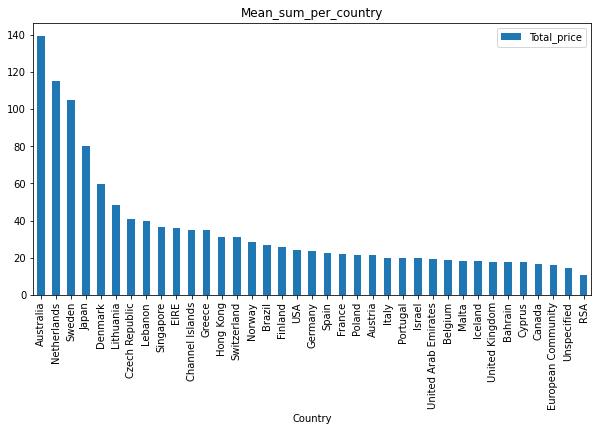

In [ ]:
# посчитаем среднюю цену покупки по странам
mean_pr_by_cntr = df_corr.groupby('Country')[['Total_price']].mean().sort_values(by =  ['Total_price'], ascending = False)
mean_pr_by_cntr.plot(kind = 'bar')
plt.title('Mean_sum_per_country')

In [ ]:
# создадим df из кол-ва уникальных инвойсов и средней цене покупки. Посчитаем общую выручку по странам.
# родная Британия, очевидно, принесла больше всех
total_df = pd.DataFrame(num_by_cntr).merge(pd.DataFrame(mean_pr_by_cntr), left_on = 'Country', right_on  ='Country')
total_df.rename(columns = {'Total_price':'Mean_price'}, inplace = True)
total_df['total_sum'] = total_df['InvoiceNo'] * total_df['Mean_price']
total_df['total_sum'].sort_values(ascending = False)

Country
United Kingdom          224098.899393
EIRE                      8074.495979
Germany                   7392.107657
Netherlands               6916.815721
France                    6364.528958
Australia                 4463.503089
Sweden                    2094.139130
Spain                     1557.049512
Belgium                   1444.058571
Switzerland               1207.283152
Japan                      961.857778
Denmark                    954.748235
Portugal                   872.969103
Channel Islands            773.606329
Norway                     744.650505
Finland                    591.625714
Italy                      518.408378
Poland                     325.567857
Austria                    280.656458
Cyprus                     211.590000
Hong Kong                  188.359286
Greece                     175.292857
Unspecified                158.956111
Singapore                  147.180000
Israel                     137.853333
USA                         96.980000
Icel

Text(0.5, 1.0, 'Total_revenue_per_country(except UK and EIRE)')

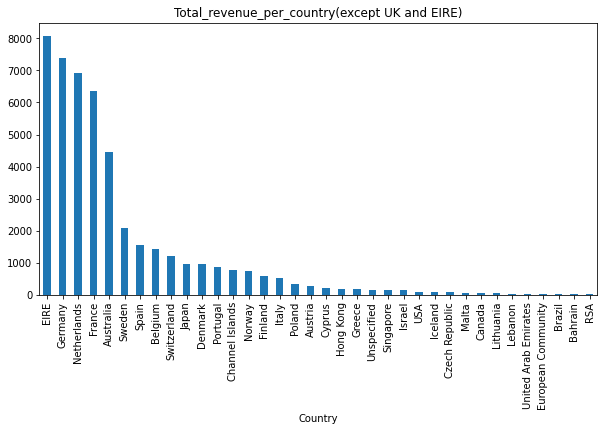

In [ ]:
# Посмотрим на столбчатый график выручки без Великобритании.
# Наибольшую выручку приносит бижнее зарубежье и ! Австралия (видимо, сказываются постколониальные связи)
total_df.drop('United Kingdom')['total_sum'].sort_values(ascending = False).plot(kind = 'bar')
plt.title('Total_revenue_per_country(except UK and EIRE)')

In [ ]:
# Подсчитаем количество уникальных клиентов по странам
cust_by_cntr = df_corr.groupby('Country')['CustomerID'].nunique().sort_values(ascending= False)
cust_by_cntr

Country
United Kingdom          3416
Germany                   84
France                    79
Spain                     25
Belgium                   24
Switzerland               20
Portugal                  19
Italy                     13
Finland                   11
Austria                    9
Norway                     9
Channel Islands            9
Australia                  8
Denmark                    8
Cyprus                     7
Netherlands                7
Sweden                     6
Japan                      6
Poland                     5
Unspecified                5
Israel                     4
Greece                     4
USA                        4
EIRE                       4
Malta                      2
United Arab Emirates       2
Canada                     2
Czech Republic             1
Bahrain                    1
Brazil                     1
Iceland                    1
Singapore                  1
Lebanon                    1
European Community         1
Hong K

In [ ]:
# Очень интересно. Две страны в топе по выручке - Ирландия и Австралия - имеют совсем немного клиентов
# но при проверке выясняется, что в Ирланидию попало много наших нанов. Однако сам факт примечателен
print('Ирландия')
print(df_corr[df_corr['Country'] == 'EIRE']['CustomerID'].value_counts())
print('*'*10)
print('Австралия')
print(df_corr[df_corr['Country'] == 'Australia']['CustomerID'].value_counts())

Ирландия
14911.0    532
14156.0    141
?           59
14016.0     14
Name: CustomerID, dtype: int64
**********
Австралия
12415.0    80
12431.0    18
12393.0    10
12388.0     7
12434.0     4
12422.0     2
12424.0     1
16321.0     1
Name: CustomerID, dtype: int64


In [ ]:
# посмотрим нанов по странам
df_corr[df_corr['CustomerID'] == '?']['Country'].value_counts()

United Kingdom    13102
EIRE                 59
Hong Kong            28
Unspecified          15
Switzerland          10
Israel                7
France                7
Portugal              4
Name: Country, dtype: int64

In [ ]:
# добавим в наш df уникальных клиентов и выведем среднюю выручку с одного клиента
total_df = total_df.merge(cust_by_cntr, left_on = 'Country', right_on  ='Country')
total_df.rename(columns = {'CustomerID':'Unique_customers'}, inplace = True)
total_df['revenue_per_customer'] = total_df['total_sum']/total_df['Unique_customers']
total_df

,InvoiceNo,Mean_price,total_sum,Unique_customers,revenue_per_customer
Country,,,,,
United Kingdom,12493,17.937957,224098.899393,3416,65.602722
Germany,310,23.845509,7392.107657,84,88.001282
France,291,21.871234,6364.528958,79,80.563658
EIRE,225,35.886649,8074.495979,4,2018.623995
Belgium,78,18.513571,1444.058571,24,60.169107
Spain,69,22.565935,1557.049512,25,62.281980
Netherlands,60,115.280262,6916.815721,7,988.116532
Portugal,44,19.840207,872.969103,19,45.945742
Switzerland,39,30.955978,1207.283152,20,60.364158


In [ ]:
# топ французских клиентов
df_corr[df_corr['Country'] == 'France'].groupby('CustomerID')['Total_price'].sum().sort_values(ascending = False)[:5]

CustomerID
12731.0    1737.00
12678.0    1518.13
12681.0    1347.82
12682.0     953.27
12567.0     895.67
Name: Total_price, dtype: float64

In [ ]:
#  Германия
df_corr[df_corr['Country'] == 'Germany'].groupby('CustomerID')['Total_price'].sum().sort_values(ascending = False)

CustomerID
12471.0    1854.93
12590.0    1426.20
12477.0    1042.08
12621.0     938.09
12705.0     908.84
            ...   
12693.0      15.00
12559.0      10.50
12561.0      10.20
12527.0      10.08
12479.0       7.80
Name: Total_price, Length: 84, dtype: float64

Text(0.5, 1.0, 'Revenue_per_customer')

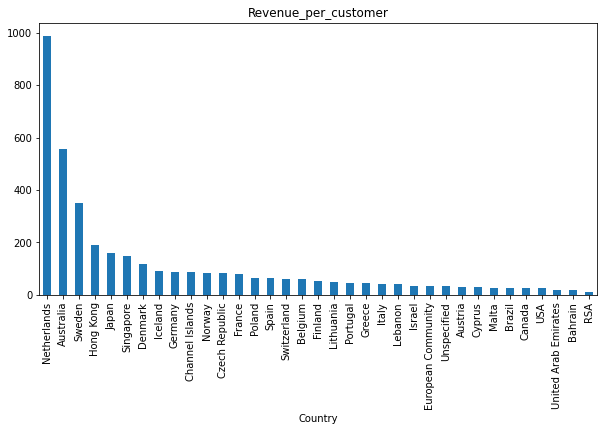

In [ ]:
# визуализируем за исключением Великобритании и Ирландии - почти все наны там, что сильно искажает картинку
total_df.drop(['United Kingdom','EIRE'])['revenue_per_customer'].sort_values(ascending = False).plot(kind = 'bar')
plt.title('Revenue_per_customer')

In [ ]:
# Итоги по странам: основа нашего магазина, конечно, Объединённое королевство - первое по всем показателям(кроме относительных метрик и среднего чека).
# Однако мы видим, что соседние страны имеют высокий средний чек - это точка возможного роста.
# Отдельно отмечаем Нидерланды, Австралию и Швецию - они не только приносят приличную выручку с высоким средним чеком, 
# но и количество уникальных клиентов там совсем немного. Этот факт требует изучения рынка сбыта в этих странах с целью поиска новых клиентов. 

Клиенты

# Клиенты

In [ ]:
# топ-20 наших покупателей(покупателя '?' пропускаем)
top_cust = df_corr.groupby('CustomerID')['Total_price'].sum().sort_values(ascending =False)[1:21]
top_cust

CustomerID
18102.0    26533.44
14646.0    25519.16
17450.0    23000.10
12415.0    16102.89
14911.0    13051.28
17949.0    12048.08
14156.0    12042.71
17511.0     9534.21
15769.0     8129.04
13694.0     7722.13
16684.0     7512.92
15311.0     7242.23
16029.0     6739.52
12931.0     6404.12
13089.0     6190.59
14088.0     5660.96
15061.0     5630.52
17857.0     5609.50
14096.0     5506.66
14298.0     5343.62
Name: Total_price, dtype: float64

In [ ]:
# посмотрим, что они покупают
# по одному только describe сразу можем увидеть оптовиков. 
# Среднее количество и общая стоимость покупки сильно превышают средние по общему датасету,квартили также сильно различны. 
# При этом отметим, что цена отдельной позиции ниже, а количество уникальных несильно отличается.
# То есть, у наших самых крупных клиентов спрос на мелочёвку.
top_cust = df_corr[df_corr['CustomerID'].isin(top_cust.index)]
print(top_cust.describe())
print(df_corr.describe())

          Quantity    UnitPrice  Total_price  Stocks_in_invoice
count  2488.000000  2488.000000  2488.000000        2488.000000
mean     46.405145     3.098734    86.625273          14.584405
std     105.691469     4.585096   229.288140          19.274354
min       1.000000     0.060000     0.420000           1.000000
25%       3.000000     1.250000     9.130000           3.000000
50%      12.000000     1.950000    19.680000           6.000000
75%      48.000000     3.750000    69.600000          13.000000
max    1728.000000   165.000000  4121.640000          74.000000
           Quantity     UnitPrice   Total_price  Stocks_in_invoice
count  52804.000000  52804.000000  52804.000000       52804.000000
mean      10.425176      3.289821     19.354979          12.065942
std       37.065193      4.383844     64.937797          16.186429
min        1.000000      0.001000      0.001000           1.000000
25%        1.000000      1.250000      3.900000           3.000000
50%        3.000000   

In [ ]:
top_cust['Description'].value_counts()[:30]

JUMBO BAG RED RETROSPOT               20
REGENCY CAKESTAND 3 TIER              12
ROSES REGENCY TEACUP AND SAUCER       11
REGENCY TEA PLATE GREEN                9
GUMBALL COAT RACK                      9
SPACEBOY LUNCH BOX                     9
DOLLY GIRL LUNCH BOX                   8
4 TRADITIONAL SPINNING TOPS            8
WHITE HANGING HEART T-LIGHT HOLDER     8
PACK OF 72 RETROSPOT CAKE CASES        8
WOOD BLACK BOARD ANT WHITE FINISH      8
JUMBO BAG PINK POLKADOT                8
JAM MAKING SET PRINTED                 8
POPCORN HOLDER                         8
JUMBO BAG APPLES                       7
VINTAGE SNAP CARDS                     7
WOODEN SCHOOL COLOURING SET            7
ASSORTED COLOUR BIRD ORNAMENT          7
JUMBO BAG PINK VINTAGE PAISLEY         7
JUMBO SHOPPER VINTAGE RED PAISLEY      7
RED STRIPE CERAMIC DRAWER KNOB         7
COOK WITH WINE METAL SIGN              7
CLOTHES PEGS RETROSPOT PACK 24         7
72 SWEETHEART FAIRY CAKE CASES         7
EDWARDIAN PARASO

In [ ]:
# посмотрим, где они живут. Видим сопадение с анализом по странам - почти всё в ВБ, но Австралия с Нидерландами и тут.
top_cust.groupby('Country')['CustomerID'].nunique()

Country
Australia          1
EIRE               2
Netherlands        1
United Kingdom    16
Name: CustomerID, dtype: int64

In [ ]:
df_corr[df_corr['Country'] == 'Australia']['CustomerID'].value_counts()

12415.0    80
12431.0    18
12393.0    10
12388.0     7
12434.0     4
12422.0     2
12424.0     1
16321.0     1
Name: CustomerID, dtype: int64

In [ ]:
df_corr[df_corr['Country'] == 'Netherlands']['CustomerID'].value_counts()

14646.0    194
12775.0     12
12759.0     11
12802.0      6
12787.0      3
12778.0      2
12791.0      1
Name: CustomerID, dtype: int64

In [ ]:
df_corr[df_corr['Country'] == 'Sweden']['CustomerID'].value_counts()

17404.0    27
12676.0     6
12638.0     5
12697.0     4
12483.0     3
12639.0     1
Name: CustomerID, dtype: int64

In [ ]:
df_corr[df_corr['Country'] == 'EIRE']['CustomerID'].value_counts()

14911.0    532
14156.0    141
?           59
14016.0     14
Name: CustomerID, dtype: int64

In [ ]:
df_corr[df_corr['Country'] == 'Hong Kong']['CustomerID'].value_counts()

?    28
Name: CustomerID, dtype: int64

In [ ]:
# выведем основные статистики по главным иностранным клиентам
print('Главный клиент Нидерланд')
print(df_corr[df_corr['CustomerID'] == 14646.0].describe())
print('Главный клиент Швеция')
print(df_corr[df_corr['CustomerID'] == 17404.0].describe())
print('Главный клиент Ирландия')
print(df_corr[df_corr['CustomerID'] == 14911.0].describe())
print('Главный клиент Австралия')
print(df_corr[df_corr['CustomerID'] == 12415.0].describe())

Главный клиент Нидерланд
          Quantity   UnitPrice  Total_price  Stocks_in_invoice
count   194.000000  194.000000   194.000000         194.000000
mean    104.809278    2.394433   131.542062           6.484536
std     162.016246    4.656903   136.250739           3.413212
min       1.000000    0.190000     0.420000           1.000000
25%      32.000000    0.720000    50.400000           4.000000
50%      72.000000    1.450000   105.600000           6.000000
75%     120.000000    2.490000   171.750000           9.000000
max    1728.000000   57.950000  1244.160000          13.000000
Главный клиент Швеция
         Quantity  UnitPrice  Total_price  Stocks_in_invoice
count   27.000000  27.000000    27.000000          27.000000
mean   155.370370   1.638148   162.914815           3.888889
std    135.124202   1.572233   114.198147           2.006400
min      6.000000   0.420000    10.500000           1.000000
25%     84.000000   0.550000    91.200000           2.500000
50%    128.000000   

In [ ]:
# Создадим атрибут  'время жизни клиентов' в количестве дней (по умолчанию 1 транзакция уже даёт один день)
min_date = df_corr.groupby('CustomerID')['InvoiceDate'].min()
max_date = df_corr.groupby('CustomerID')['InvoiceDate'].max()
dates = pd.DataFrame(min_date).merge(pd.DataFrame(max_date), left_on = 'CustomerID', right_on= 'CustomerID')
dates['Sum_time'] = (dates['InvoiceDate_y'] -  dates['InvoiceDate_x']).dt.days + 1
df_corr = df_corr.merge(dates['Sum_time'],left_on = 'CustomerID', right_on= 'CustomerID' )

In [ ]:
# большинство клиентов пользуются нашим магазином хотя бы полгода
df_corr['Sum_time'].describe()

count    52804.000000
mean       266.015094
std        128.385132
min          1.000000
25%        185.000000
50%        329.000000
75%        374.000000
max        375.000000
Name: Sum_time, dtype: float64

In [ ]:
# топ-20 клиентов по времени сотрудничества с нами
pd.Series(df_corr[df_corr['CustomerID'] != '?'].sort_values(by='Sum_time', ascending = False)['CustomerID'].unique()[:20])

0     15311.0
1     12433.0
2     14911.0
3     16210.0
4     14606.0
5     17841.0
6     17581.0
7     14135.0
8     15525.0
9     16539.0
10    17511.0
11    17757.0
12    14395.0
13    17346.0
14    17920.0
15    16891.0
16    13694.0
17    12748.0
18    13069.0
19    18109.0
dtype: object

Товары

# Товары

In [ ]:
# Посмотрим на топ-20 товаров по попаданию в инвойсы
top_stock_by_inv = df_corr.groupby('StockCode')['InvoiceNo'].count().sort_values(ascending =False)[:20]
top_stock_by_inv = df_corr[df_corr['StockCode'].isin(top_stock_by_inv.index)]
top_stock_by_inv['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    230
JUMBO BAG RED RETROSPOT               219
REGENCY CAKESTAND 3 TIER              182
LUNCH BAG RED RETROSPOT               167
PACK OF 72 RETROSPOT CAKE CASES       161
PARTY BUNTING                         159
LUNCH BAG  BLACK SKULL.               145
JUMBO BAG PINK POLKADOT               139
JUMBO SHOPPER VINTAGE RED PAISLEY     136
ASSORTED COLOUR BIRD ORNAMENT         136
SET OF 3 CAKE TINS PANTRY DESIGN      136
NATURAL SLATE HEART CHALKBOARD        136
WOODEN PICTURE FRAME WHITE FINISH     124
SPOTTY BUNTING                        123
ALARM CLOCK BAKELIKE RED              121
PAPER CHAIN KIT 50'S CHRISTMAS        120
LUNCH BAG SPACEBOY DESIGN             119
LUNCH BAG SUKI DESIGN                 102
POPCORN HOLDER                         82
LUNCH BAG VINTAGE DOILY                67
LUNCH BAG DOILEY PATTERN               56
SMALL POPCORN HOLDER                   36
LUNCH BAG SUKI  DESIGN                 20
CREAM HANGING HEART T-LIGHT HOLDER

In [ ]:
# и топ по количеству купленных штук
top_stock_by_qnt = df_corr.groupby('Description')['Quantity'].sum().sort_values(ascending = False)[:20]
top_stock_by_qnt

Description
PACK OF 72 RETROSPOT CAKE CASES        5241
JUMBO BAG RED RETROSPOT                5129
ASSORTED COLOUR BIRD ORNAMENT          4447
WORLD WAR 2 GLIDERS ASSTD DESIGNS      4276
RED  HARMONICA IN BOX                  3834
ASSORTED COLOURS SILK FAN              3777
WHITE HANGING HEART T-LIGHT HOLDER     3424
SMALL CHINESE STYLE SCISSOR            3075
JUMBO BAG PINK POLKADOT                3052
MINI PAINT SET VINTAGE                 2960
GIRLS ALPHABET IRON ON PATCHES         2768
BROCADE RING PURSE                     2631
ESSENTIAL BALM 3.5g TIN IN ENVELOPE    2439
POPCORN HOLDER                         2417
CHARLOTTE BAG SUKI DESIGN              2189
JUMBO BAG APPLES                       2166
RABBIT NIGHT LIGHT                     2165
GINGHAM HEART DECORATION               2153
RED RETROSPOT CHARLOTTE BAG            2116
JUMBO  BAG BAROQUE BLACK WHITE         2111
Name: Quantity, dtype: int64

In [ ]:
# проверим, есть ли разница в популярности товаров по странам
# Увидим тех же лидеров, что и по общему количеству клиентов и инвойсов
top_stock_by_inv['Country'].value_counts()

United Kingdom     2705
France               51
EIRE                 49
Germany              32
Australia            12
Spain                11
Belgium              11
Switzerland          10
Netherlands           9
Portugal              8
Channel Islands       5
Sweden                3
Norway                2
Israel                2
Unspecified           2
Italy                 2
USA                   1
Iceland               1
Finland               1
Singapore             1
Cyprus                1
Name: Country, dtype: int64

In [ ]:
df_corr[df_corr['Description'].isin(top_stock_by_qnt.index)]['Country'].value_counts()

United Kingdom     1675
France               35
EIRE                 31
Germany              23
Netherlands          15
Belgium              10
Portugal              9
Switzerland           5
Spain                 5
Australia             4
Channel Islands       4
Denmark               3
Israel                2
Sweden                2
Norway                2
Italy                 2
Cyprus                1
Singapore             1
Japan                 1
Iceland               1
Unspecified           1
Poland                1
Hong Kong             1
Name: Country, dtype: int64

In [ ]:
# Посмотрим , насколько разнообразны могут быть цены на отдельный товар
df_corr.groupby('Description')['UnitPrice'].nunique().sort_values(ascending = False).head(30)

Description
RED WOOLLY HOTTIE WHITE HEART.        11
DOORMAT RED RETROSPOT                 10
WOOD BLACK BOARD ANT WHITE FINISH     10
DOORMAT FANCY FONT HOME SWEET HOME     9
COLOURING PENCILS BROWN TUBE           9
HOT WATER BOTTLE I AM SO POORLY        9
JUMBO BAG PINK POLKADOT                9
SCOTTIE DOG HOT WATER BOTTLE           9
CHICK GREY HOT WATER BOTTLE            9
DOORMAT SPOTTY HOME SWEET HOME         9
COOK WITH WINE METAL SIGN              8
WALL TIDY RETROSPOT                    8
SUKI  SHOULDER BAG                     8
DOORMAT UNION FLAG                     8
JUMBO BAG PINK VINTAGE PAISLEY         8
JUMBO SHOPPER VINTAGE RED PAISLEY      8
DOORMAT FAIRY CAKE                     8
DOORMAT HEARTS                         8
JUMBO STORAGE BAG SUKI                 8
PARTY BUNTING                          8
HOT WATER BOTTLE TEA AND SYMPATHY      8
PACK OF 72 RETROSPOT CAKE CASES        8
FAWN BLUE HOT WATER BOTTLE             8
DOORMAT UNION JACK GUNS AND ROSES      8
CHOC

In [ ]:
# как мы уже видели на клиентах, у нас покупают в основном мелочёвку. Проверим это на товарах.
df_corr['UnitPrice'].describe(percentiles = [.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

count    52804.000000
mean         3.289821
std          4.383844
min          0.001000
1%           0.290000
10%          0.650000
20%          0.850000
30%          1.250000
40%          1.650000
50%          2.080000
60%          2.550000
70%          3.750000
80%          4.950000
90%          7.620000
99%         16.630000
max        195.000000
Name: UnitPrice, dtype: float64

In [ ]:
df_corr.describe()

,Quantity,UnitPrice,Total_price,Stocks_in_invoice,Sum_time
count,52804.000000,52804.000000,52804.000000,52804.000000,52804.000000
mean,10.425176,3.289821,19.354979,12.065942,266.015094
std,37.065193,4.383844,64.937797,16.186429,128.385132
min,1.000000,0.001000,0.001000,1.000000,1.000000
25%,1.000000,1.250000,3.900000,3.000000,185.000000
50%,3.000000,2.080000,9.900000,6.000000,329.000000
75%,11.000000,4.130000,17.430000,13.000000,374.000000
max,2400.000000,195.000000,4121.640000,127.000000,375.000000


In [ ]:
# Взяв верхний 1% , мы и здесь видим выброс по цене. Цифры по количеству показывают, что эти товары покупают мало того, что редко, так ещё и немного.
# Зато по количеству позиций в счёте понимаем, что это счета с большим количеством позиций.
df_corr[df_corr['UnitPrice'] > 17].describe()

,Quantity,UnitPrice,Total_price,Stocks_in_invoice,Sum_time
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,1.686747,33.153042,53.917078,19.789157,325.382530
std,2.813123,28.408128,85.821390,19.297734,109.239315
min,1.000000,17.880000,17.880000,1.000000,1.000000
25%,1.000000,20.790000,20.790000,5.000000,372.250000
50%,1.000000,24.960000,25.490000,15.000000,374.000000
75%,1.000000,29.830000,49.920000,26.000000,374.000000
max,38.000000,195.000000,968.620000,127.000000,374.000000


In [ ]:
# Всего 29 записей с действительно дорогими для нашего магазина товарами. При этом здесь видим пониженное количество позиций по счёту.
df_corr[df_corr['UnitPrice'] > 50].describe()

,Quantity,UnitPrice,Total_price,Stocks_in_invoice,Sum_time
count,29.000000,29.000000,29.000000,29.000000,29.000000
mean,1.344828,113.825517,149.303103,9.413793,238.620690
std,0.669534,42.147659,72.830052,11.611316,147.251101
min,1.000000,57.950000,58.290000,1.000000,1.000000
25%,1.000000,74.960000,79.950000,3.000000,103.000000
50%,1.000000,125.000000,125.000000,4.000000,295.000000
75%,2.000000,125.000000,195.000000,12.000000,374.000000
max,4.000000,195.000000,290.000000,46.000000,374.000000


In [ ]:
# посмотрим на контрасте на все записи с ценой ниже 4 - это 75% нашего датасета.
df_corr[df_corr['UnitPrice'] < 4].describe()

,Quantity,UnitPrice,Total_price,Stocks_in_invoice,Sum_time
count,38895.000000,38895.000000,38895.000000,38895.000000,38895.000000
mean,12.759275,1.724925,17.115177,10.982568,258.854917
std,42.138988,0.964123,59.957799,15.031265,129.012461
min,1.000000,0.001000,0.001000,1.000000,1.000000
25%,2.000000,0.850000,2.920000,3.000000,169.000000
50%,6.000000,1.650000,7.800000,5.000000,316.000000
75%,12.000000,2.460000,16.500000,11.000000,370.000000
max,2400.000000,3.950000,4121.640000,127.000000,375.000000


In [ ]:
df_corr[df_corr['UnitPrice'] > 50]['Description']

1283     RUSTIC  SEVENTEEN DRAWER SIDEBOARD
3689       SET/4 WHITE RETRO STORAGE CUBES 
5826       SET/4 WHITE RETRO STORAGE CUBES 
7927     STEEL SWEETHEART ROUND TABLE CREAM
8787                 CINDERELLA CHANDELIER 
9604       SET/4 WHITE RETRO STORAGE CUBES 
9682              SILVER ROCCOCO CHANDELIER
12166      SET/4 WHITE RETRO STORAGE CUBES 
16348           VINTAGE POST OFFICE CABINET
16553         LOVE SEAT ANTIQUE WHITE METAL
19336           VINTAGE RED KITCHEN CABINET
22532    RUSTIC  SEVENTEEN DRAWER SIDEBOARD
22533          REGENCY MIRROR WITH SHUTTERS
23657         LOVE SEAT ANTIQUE WHITE METAL
27211           VINTAGE RED KITCHEN CABINET
28156                SCHOOL DESK AND CHAIR 
32750                SCHOOL DESK AND CHAIR 
33029           VINTAGE RED KITCHEN CABINET
37305           VINTAGE RED KITCHEN CABINET
37306          VINTAGE BLUE KITCHEN CABINET
38103         LOVE SEAT ANTIQUE WHITE METAL
39443         CHEST NATURAL WOOD 20 DRAWERS
39444    RUSTIC  SEVENTEEN DRAWE

In [ ]:
# посмотрим ранее изученных клиентов-топов ещё раз по цене
top_cust['UnitPrice'].describe()

count    2488.000000
mean        3.098734
std         4.585096
min         0.060000
25%         1.250000
50%         1.950000
75%         3.750000
max       165.000000
Name: UnitPrice, dtype: float64

In [ ]:
# Выводы: товарная основа нашей выручки - небольшие дешёвые товары. Их покупают чаще всего и больше всего, причём наши топовые клиенты
# берут в основном дешёвые товары.
# У нас нет данных о скорости реализации товаров, марже и какой процент товарных остатков занимают дорогие позиции, 
# но можно задаться вопросом: нужны ли нам вообще товары стоимостью выше условных 50 ? Нужна ли нам мебель?
# Также нужно обратить внимание на ценовой разрыв между самыми дорогими позициями и остальными товарами.

Финансы и некоторые метрики

# Некоторые итоги

In [ ]:
# Общая выручка
df_corr['Total_price'].sum()

1022020.331

In [ ]:
# Среднее количество инвойсов на клиента
df_corr.groupby('CustomerID')['InvoiceNo'].count().mean()

13.936130905252046

In [ ]:
# Средняя выручка на инвойс
df_corr['Total_price'].sum()/df_corr['InvoiceNo'].nunique()

73.60607353258912

In [ ]:
# количество клиентов, покупавших только 1 день
df_corr[df_corr['Sum_time'] == 1]['CustomerID'].nunique()

1558

In [ ]:
# Среднее количество дней между инвойсами (но это так себе категория в таком варианте - слишком много однодневных клиентов)
df_corr['Sum_time'].mean()/(df_corr['InvoiceNo'].nunique()/df_corr['CustomerID'].nunique())

72.59137122609164

In [ ]:
# выручка с топ-20 клиентов. 20 % нашей выручки приносит половина 1% наших клиентов.
top_cust['Total_price'].sum()

215523.68

In [ ]:
# выручка за среднее время жизни клиента
df_corr['Total_price'].sum()/df_corr['Sum_time'].mean()

3841.963692163141

Text(0.5, 1.0, 'Revenue per month')

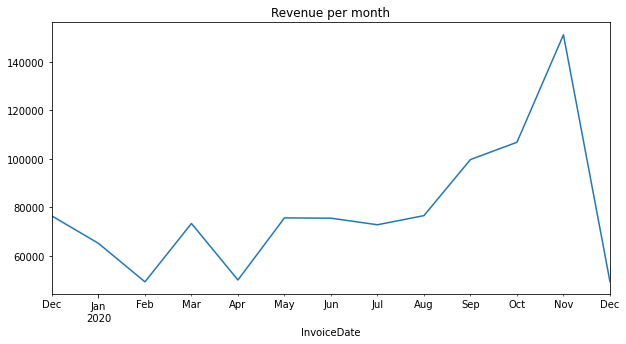

In [ ]:
# выручка по месяцам(падение в конечном декабре связано лишь с тем, что данные по нему только по 9 число) 
df_corr.groupby(df_corr['InvoiceDate'].dt.to_period('M'))['Total_price'].sum().plot()
plt.title('Revenue per month')

In [ ]:
df_corr['InvoiceDate'].max()

Timestamp('2020-12-09 12:50:00')

In [ ]:
# вернёмся к возвратам, которые убирали при чистке данных
canceled = df[df['InvoiceNo'].str.contains('[C]', regex = True)]
canceled['Total_price'] = canceled['Quantity']*canceled['UnitPrice']
canceled.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Quantity,UnitPrice,Total_price
count,960.000000,960.000000,960.000000
mean,-14.276042,31.399042,-58.408438
std,65.158008,333.241964,371.542791
min,-1296.000000,0.030000,-6930.000000
25%,-6.000000,1.450000,-17.857500
50%,-2.000000,2.890000,-8.500000
75%,-1.000000,4.950000,-3.750000
max,-1.000000,6930.000000,-0.190000


In [ ]:
# не понравились шведам наборы матрёшек
canceled.sort_values(by = 'Total_price')[:10]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
17425,C551699,M,Manual,-1,2020-05-03 14:12:00,6930.00,16029.0,United Kingdom,-6930.00
31245,C564341,AMAZONFEE,AMAZON FEE,-1,2020-08-24 14:53:00,6662.51,NaN,United Kingdom,-6662.51
35026,C567527,23113,PANTRY CHOPPING BOARD,-756,2020-09-21 09:16:00,5.06,17450.0,United Kingdom,-3825.36
12122,C546557,M,Manual,-1,2020-03-15 09:44:00,2583.76,NaN,Hong Kong,-2583.76
32110,C565044,22191,IVORY DINER WALL CLOCK,-318,2020-08-31 17:02:00,7.65,12931.0,United Kingdom,-2432.70
42864,C573550,AMAZONFEE,AMAZON FEE,-1,2020-10-31 13:32:00,2185.04,NaN,United Kingdom,-2185.04
39137,C570556,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1296,2020-10-11 11:10:00,1.06,16029.0,United Kingdom,-1373.76
2980,C538847,85232B,SET OF 3 BABUSHKA STACKING TINS,-240,2019-12-14 13:27:00,4.95,17404.0,Sweden,-1188.00
39136,C570556,22149,FELTCRAFT 6 FLOWER FRIENDS,-600,2020-10-11 11:10:00,1.85,16029.0,United Kingdom,-1110.00
8920,C543789,M,Manual,-1,2020-02-11 17:10:00,856.48,17450.0,United Kingdom,-856.48


In [ ]:
# мануалы и некие платежи амазону очень искажают среднюю суммы возврата
canceled[(canceled['StockCode'] != 'AMAZONFEE') & (canceled['StockCode'] != 'M')].describe()

,Quantity,UnitPrice,Total_price
count,932.000000,932.000000,932.000000
mean,-14.466738,6.692275,-34.332639
std,66.035908,25.971622,172.728922
min,-1296.000000,0.030000,-3825.360000
25%,-6.000000,1.450000,-17.070000
50%,-2.000000,2.650000,-8.300000
75%,-1.000000,4.950000,-3.345000
max,-1.000000,475.690000,-0.190000


In [ ]:
print('Общая сумма по возвратам')
print('с мануалами:', canceled['Total_price'].sum())
print('Без:', canceled[(canceled['StockCode'] != 'AMAZONFEE') & (canceled['StockCode'] != 'M')]['Total_price'].sum())

Общая сумма по возвратам
с мануалами: -56072.1
Без: -31998.019999999997


In [ ]:
# количество уникальных клиентов, возвращавших товары
canceled['CustomerID'].nunique()

517

In [ ]:
# количество уникальных возвращённых товаров
canceled['StockCode'].nunique()

611

In [ ]:
# Итого возвраты ~ 5% от выручки и каждый 7 клиент хоть раз возвращал товары

In [ ]:
# Ещё раз сет с странами
total_df.sort_values(by = ['Mean_price','revenue_per_customer'], ascending = False)

,InvoiceNo,Mean_price,total_sum,Unique_customers,revenue_per_customer
Country,,,,,
Australia,32,139.484472,4463.503089,8,557.937886
Netherlands,60,115.280262,6916.815721,7,988.116532
Sweden,20,104.706957,2094.139130,6,349.023188
Japan,12,80.154815,961.857778,6,160.309630
Denmark,16,59.671765,954.748235,8,119.343529
Lithuania,1,48.600000,48.600000,1,48.600000
Czech Republic,2,41.100000,82.200000,1,82.200000
Lebanon,1,39.600000,39.600000,1,39.600000
Singapore,4,36.795000,147.180000,1,147.180000


In [ ]:
df_corr.describe()

,Quantity,UnitPrice,Total_price,Stocks_in_invoice,Sum_time
count,52804.000000,52804.000000,52804.000000,52804.000000,52804.000000
mean,10.425176,3.289821,19.354979,12.065942,266.015094
std,37.065193,4.383844,64.937797,16.186429,128.385132
min,1.000000,0.001000,0.001000,1.000000,1.000000
25%,1.000000,1.250000,3.900000,3.000000,185.000000
50%,3.000000,2.080000,9.900000,6.000000,329.000000
75%,11.000000,4.130000,17.430000,13.000000,374.000000
max,2400.000000,195.000000,4121.640000,127.000000,375.000000
